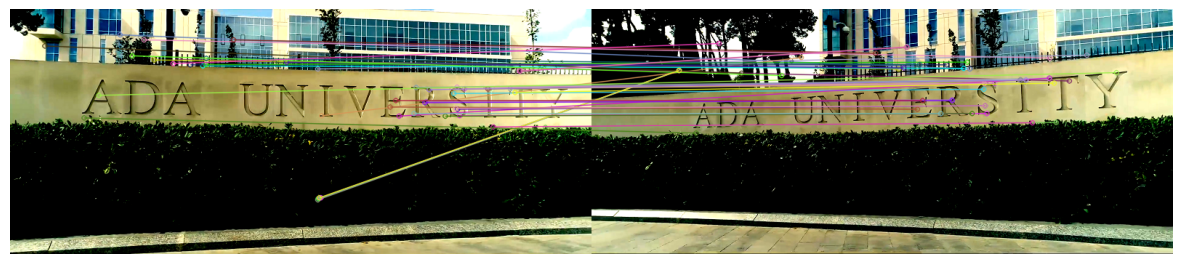

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def load_images(image_path1, image_path2):
    img1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)
    img1_rgb = cv2.imread(image_path1, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.imread(image_path2, cv2.COLOR_BGR2RGB)
    return img1, img2, img1_rgb, img2_rgb

def detect_and_describe(image):
    orb = cv2.ORB_create(nfeatures=1000)  # Increased number of features
    keypoints, descriptors = orb.detectAndCompute(image, None)
    return keypoints, descriptors

def match_keypoints(desc1, desc2):
    index_params = dict(algorithm=6, table_number=6, key_size=12, multi_probe_level=1)
    search_params = dict(checks=50)

    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(desc1, desc2, k=2)
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)
    return good_matches

def draw_matches(img1, img2, kp1, kp2, matches):
    matched_image = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    matched_image = cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15, 8))
    plt.imshow(matched_image)
    plt.axis('off')
    plt.show()


image_path1 = 'Original_Images/ORB_Images/First_Frame.png'
image_path2 = 'Original_Images/ORB_Images/Second_Frame.png'

img1, img2, img1_rgb, img2_rgb = load_images(image_path1, image_path2)


kp1, desc1 = detect_and_describe(img1)
kp2, desc2 = detect_and_describe(img2)
matches = match_keypoints(desc1, desc2)

draw_matches(img1_rgb, img2_rgb, kp1, kp2, matches)